## Proyek Analisis Data: Nama dataset

### - Nama: Rizky Hudha Noesaputra 
### - Email: rezky.hudha@gmail.com
### - Id Dicoding: Rizkyhudha91

A bicycle sharing system is a system that allows users to rent bicycles from one location and return them at another location. This concept is different from conventional bike rental services because all the processes, including registration, rental and return, are automated.

Currently, there are more than 500 bicycle sharing programs spread throughout the world, with the number of bicycles reaching more than 500 thousand units. This system is attracting attention because of its significant role in addressing traffic problems, environmental impacts, and public health.

Apart from practical benefits in everyday life, bicycle sharing systems are also an interesting object of research. This is due to the availability of rich data, such as information about trip duration, starting location and destination, which is recorded in great detail.


### Import Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


Gathering Data

At this stage we will collect the data that we have collected. Because I chose Bike Sharing Dataset, I imported the day.csv file


In [5]:
day_df = pd.read_csv("../Submission/dataset/day.csv")
day_df.head()
     

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Checking data type

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Checking Missing Value

In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Checking Duplicate Data

In [8]:
print('Count Duplicate Rows: {}'.format(day_df.duplicated().sum()))

Count Duplicate Rows: 0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Cleaning Data

Remove column instan and windspeed

In [10]:
drop_cols = ['instan', 'windspeed']

for i in day_df.columns:
   if i in drop_cols:
      day_df.drop(i, axis=1, inplace=True)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


Change name columns

In [11]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [12]:

day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
     


In [13]:


day_df['dateday'] = pd.to_datetime(day_df.dateday)

day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()
     


,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    category      
 4   month         731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    category      
 7   workingday    731 non-null    category      
 8   weather_cond  731 non-null    category      
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  casual        731 non-null    int64         
 13  registered    731 non-null    int64         
 14  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float

## EDA

Group bicycle renters (both casual and registered) by month

In [15]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

/tmp/ipykernel_18208/2974312987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Group bicycle renters (both casual and registered) based on weather conditions

In [16]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

/tmp/ipykernel_18208/2311190310.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Group bicycle renters (both casual and registered) based on holiday

In [17]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

/tmp/ipykernel_18208/1497150874.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Compare bike rentals on weekdays vs weekends

In [18]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})    

/tmp/ipykernel_18208/1182764729.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Group bicycle renters (both casual and registered) based on working days

In [19]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

/tmp/ipykernel_18208/3484920239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Group bicycle renters (both casual and registered) by season

In [20]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

/tmp/ipykernel_18208/3641718347.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Group temp, hum, and humidity based on season

In [21]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

/tmp/ipykernel_18208/3725487608.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

Relationship between casual, registered and count tenants

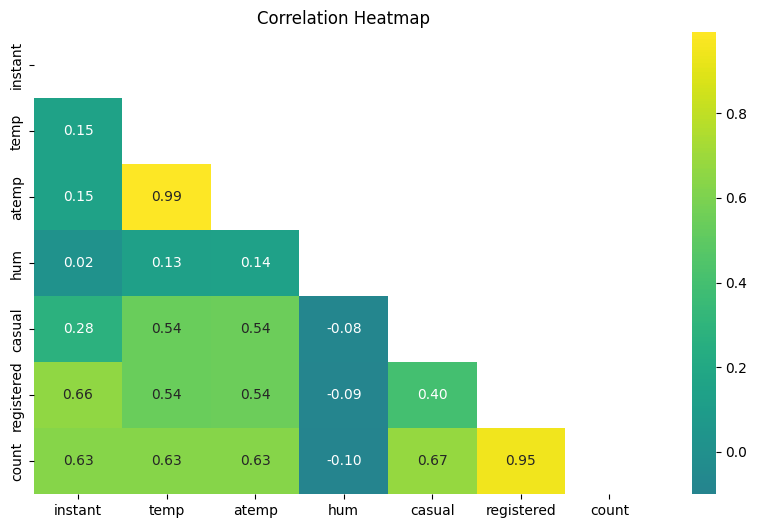

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="viridis",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Based on the results of the analysis above, the following statement was obtained:

- atemp and temp are highly correlated (0.99).
- hum has a weak correlation with temp and atemp (0.13 and 0.14).
- casual is moderately correlated with temp and atemp (0.54), and slightly negatively with hum (-0.08).
-  registered has the same pattern as casual, and is moderately correlated with casual (0.40).
-  count correlated strongly with temp, atemp, casual, and registered (0.63, 0.63, 0.67, and 0.95), and slightly negatively with hum (-0.10).

## Visualization & Explanatory Analysis

The influence of weather on the number of bicycle users

/tmp/ipykernel_18208/1236500788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


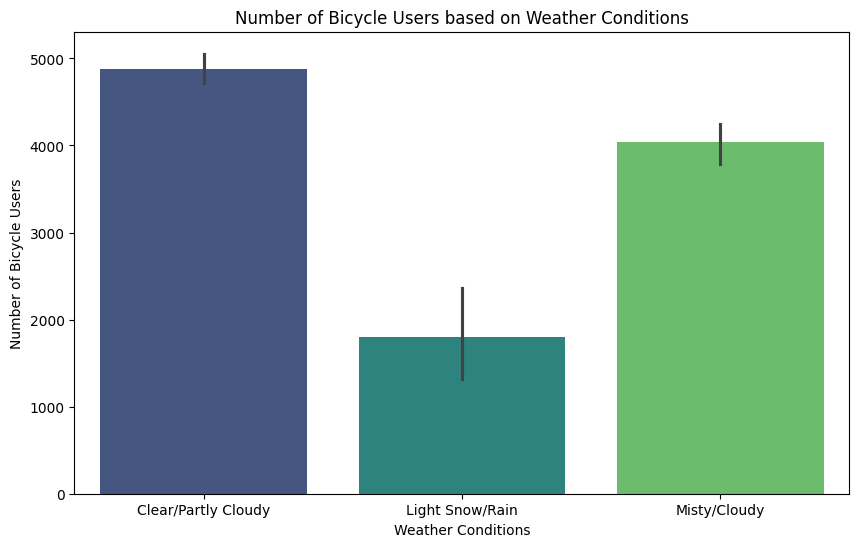

In [25]:

plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day_df,
    palette='viridis')

plt.title('Number of Bicycle Users based on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Bicycle Users')
plt.show()


What conditions do you see when the bicycle is used on working days, holidays and weekdays?

/tmp/ipykernel_18208/392825514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_18208/392825514.py:6: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/tmp/ipykernel_18208/392825514.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_18208/392825514.py:17: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/tmp/ipykernel_18208/392825514.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


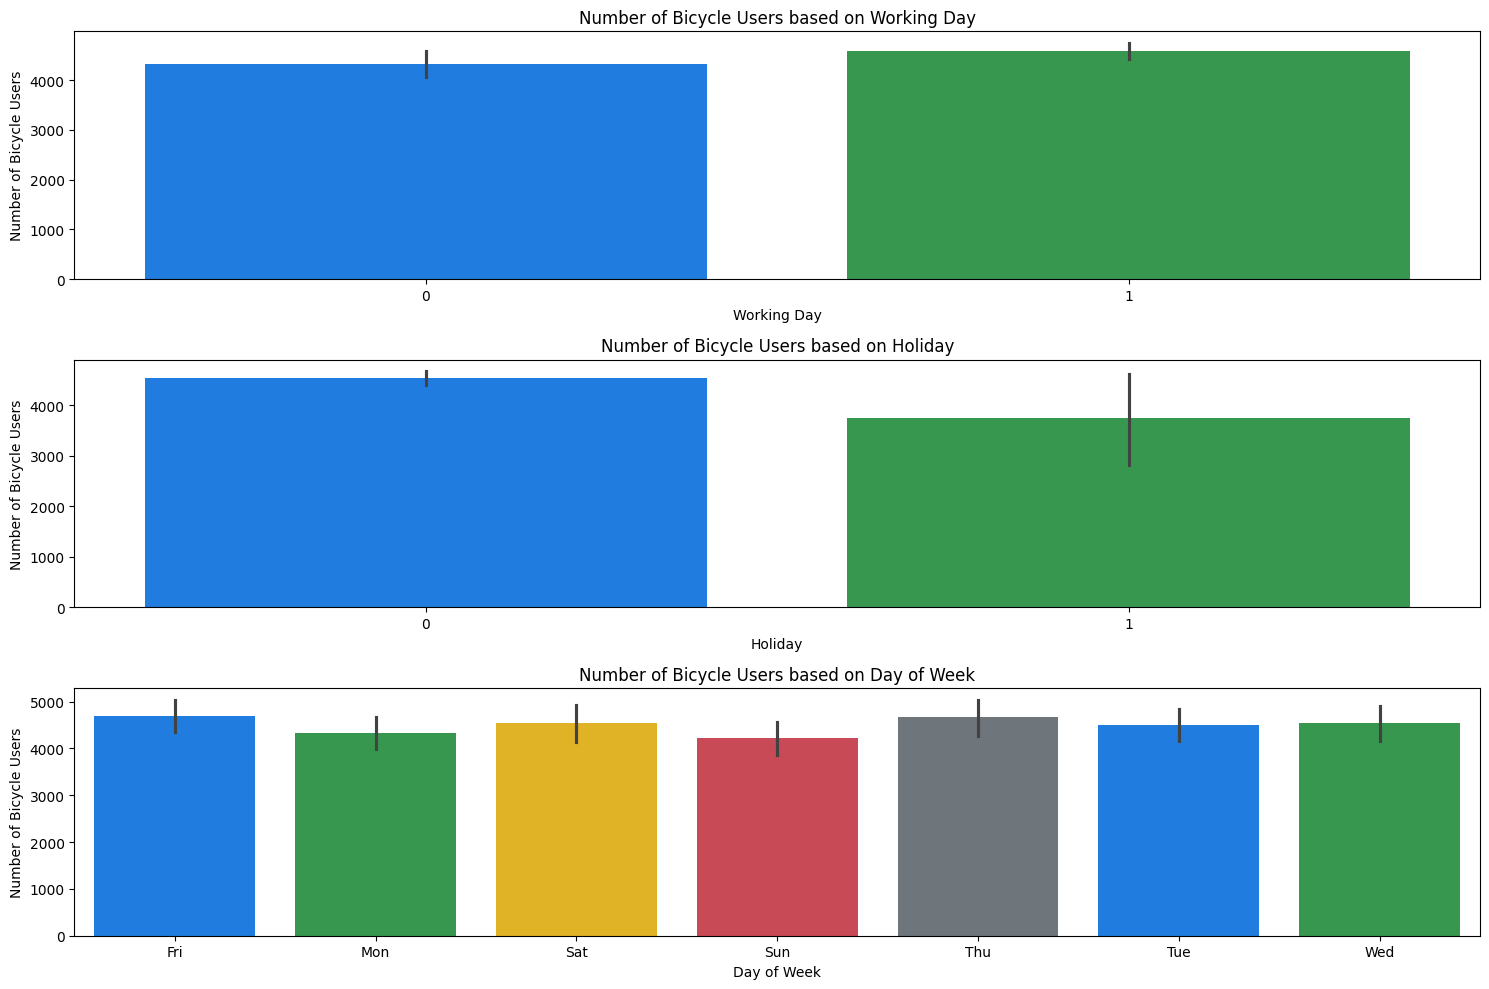

In [27]:
colors = ['#007bff', '#28a745', '#ffc107', '#dc3545', '#6c757d']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    palette=colors,
    ax=axes[0])
axes[0].set_title('Number of Bicycle Users based on Working Day')
axes[0].set_xlabel('Working Day')
axes[0].set_ylabel('Number of Bicycle Users')

# holiday
sns.barplot(
    x='holiday',
    y='count',
    data=day_df,
    palette=colors,
    ax=axes[1])
axes[1].set_title('Number of Bicycle Users based on Holiday')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Number of Bicycle Users')

# weekday
sns.barplot(
    x='weekday',
    y='count',
    data=day_df,
    palette=colors,
    ax=axes[2])
axes[2].set_title('Number of Bicycle Users based on Day of Week')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Number of Bicycle Users')

plt.tight_layout()
plt.show()


Based on the data visualization above using a bar plot, the following statement is obtained:

- The number of bicycle renters is greater on weekdays (i.e. Monday - Friday) than on weekends (i.e. Saturday and Sunday). 0 indicates weekends and 1 indicates weekdays.
- The number of bicycle renters is much greater on weekdays (not holidays) than on (national) holidays.
- The number of bicycle renters on Friday is in first place as the day with the most bicycle renters, and Sunday is in last place with the fewest number of bicycle renters.



What are the trends in bicycle use over the years, is 2011 or 2012 superior?

/tmp/ipykernel_18208/2995701355.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month","year"]).agg({


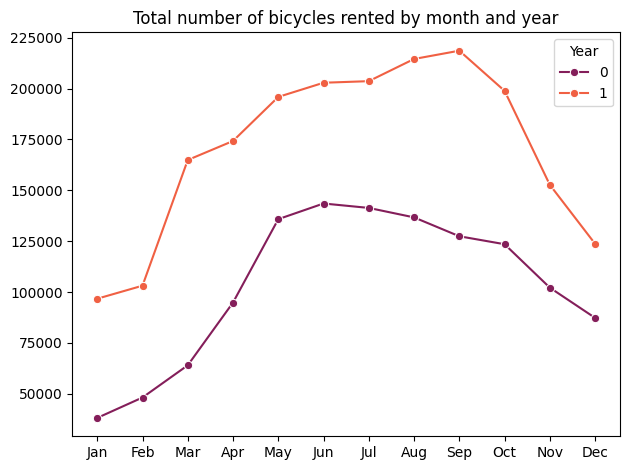

In [28]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Total number of bicycles rented by month and year")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Year", loc="upper right")
plt.tight_layout()
plt.show()

Is there a seasonal influence on bicycle renters based on Casual and Registered customers?

/tmp/ipykernel_18208/125593990.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


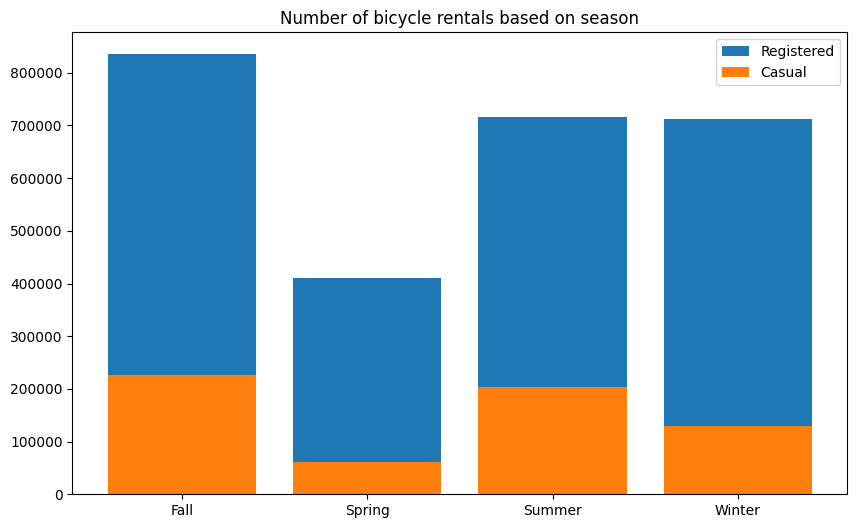

In [31]:
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of bicycle rentals based on season')
plt.legend()
plt.show()

Based on the results of the analysis above using bar plots, it can be concluded that in all seasons the most enjoyed by bicycle users (Casual and Registered) is autumn (Fall), followed by summer (Summer), winter (Winter), and ending with spring (Spring).

Conclusion question 1:

It can be clearly seen that there is a relationship between the two. Bicycle renters really like it when the weather is sunny/slightly cloudy with Q3 above 6000 and Q1 less than 4000 and the median is almost 5000. Then the second position is occupied when the weather is foggy/cloudy with Q3 above 5000 and Q1 below 3000 and the median is above 4000. Lastly Users don't like it when the atmosphere is a little snowy/rainy with Q3 above 2000 and Q1 below 1000 and the median is above 1000. And for weather during big storms there is no data, because it is not possible to cycle in such weather conditions.

- conclusion question 2:

The conditions seen in this visualization are divided into three parts. For the number of bicycle users based on working days, working days outperform non-working days, although the results are not very significant, but there is still a clear difference even though both have above 4000 users. Continuing based on holidays, here non-holidays win with quite a significant difference compared to holidays. This may mean that users prefer to rent bicycles on weekdays. Finally, based on weekday, based on the data above, Friday (Fri) is in first place with a mean of 4690.288462 and in last place is Sunday (Sun): 4228.828571.

- Conclusion question 3:

In this visualization, we can observe that in the two years, namely 2011 and 2012, there were differences in the peak and base of the month in the two years. The peak in 2011 was in June and the bottom was in January. Meanwhile, the peak in 2012 was in September and the base was the same, namely January. And from these two visualizations we can observe that the total number of bicycles rented in 2012 was all higher than in 2011.

    

- Conclusion question 4:

In the final visualization, it turns out that the results obtained are quite surprising, where winter is not the last, but the last is spring. This can be caused by many factors such as weather conditions, air temperature, working days, holidays, and so on. Meanwhile, the first place is occupied by autumn (Fall) which was able to achieve bicycle rentals of more than 800,000.